In [263]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.pandas


In [264]:
# grab data set from url *multipul updates each day make sure we are on current tab....

cv_data = pd.read_html('https://docs.google.com/spreadsheets/d/1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM/htmlview?usp=sharing&sle=true#')

In [265]:
#combine all tabs from data set
cv_data =pd.concat(cv_data)
cv_data

/Users/jordanpatton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,A,B,C,D,E,F,G,H,I,Unnamed: 0
0,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,NaN,NaN,NaN,1
1,Hubei,Mainland China,2/7/20 14:03,22112,618,867,NaN,NaN,NaN,2
2,Guangdong,Mainland China,2/7/20 10:13,1034,1,88,NaN,NaN,NaN,3
3,Zhejiang,Mainland China,2/7/20 11:33,1006,0,123,NaN,NaN,NaN,4
4,Henan,Mainland China,2/7/20 14:03,914,3,86,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...
23,Heilongjiang,China,1/21/2020,NaN,1,NaN,NaN,NaN,NaN,24
24,NaN,Japan,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,25
25,NaN,Thailand,1/21/2020,2,NaN,NaN,NaN,NaN,NaN,26
26,NaN,South Korea,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,27


In [266]:

#remove Strings from 1st row
cv_data.drop([0], inplace=True)
cv_data

,A,B,C,D,E,F,G,H,I,Unnamed: 0
1,Hubei,Mainland China,2/7/20 14:03,22112,618,867,NaN,NaN,NaN,2
2,Guangdong,Mainland China,2/7/20 10:13,1034,1,88,NaN,NaN,NaN,3
3,Zhejiang,Mainland China,2/7/20 11:33,1006,0,123,NaN,NaN,NaN,4
4,Henan,Mainland China,2/7/20 14:03,914,3,86,NaN,NaN,NaN,5
5,Hunan,Mainland China,2/7/20 11:33,772,0,112,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...
23,Heilongjiang,China,1/21/2020,NaN,1,NaN,NaN,NaN,NaN,24
24,NaN,Japan,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,25
25,NaN,Thailand,1/21/2020,2,NaN,NaN,NaN,NaN,NaN,26
26,NaN,South Korea,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,27


In [267]:
#drop "Unnamed:0"

#cv_data =cv_data.drop(columns=['Unnamed: 0','G','H','I'], inplace=True)

#cv_data

#rename columns in dataframe

cv_data = cv_data.rename(columns={
    'A':'Province/State',
    'B':'Country/Region',
    'C':'Last_Update',
    'D':'Infected',
    'E':'Deaths',
    'F':'Recovered',
    
})

In [268]:
cv_data.head()

,Province/State,Country/Region,Last_Update,Infected,Deaths,Recovered,G,H,I,Unnamed: 0
1,Hubei,Mainland China,2/7/20 14:03,22112,618,867,NaN,NaN,NaN,2
2,Guangdong,Mainland China,2/7/20 10:13,1034,1,88,NaN,NaN,NaN,3
3,Zhejiang,Mainland China,2/7/20 11:33,1006,0,123,NaN,NaN,NaN,4
4,Henan,Mainland China,2/7/20 14:03,914,3,86,NaN,NaN,NaN,5
5,Hunan,Mainland China,2/7/20 11:33,772,0,112,NaN,NaN,NaN,6


In [269]:
#set index

cv_data =cv_data.set_index('Last_Update')

cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered,G,H,I,Unnamed: 0
Last_Update,,,,,,,,,
2/7/20 14:03,Hubei,Mainland China,22112,618,867,NaN,NaN,NaN,2
2/7/20 10:13,Guangdong,Mainland China,1034,1,88,NaN,NaN,NaN,3
2/7/20 11:33,Zhejiang,Mainland China,1006,0,123,NaN,NaN,NaN,4
2/7/20 14:03,Henan,Mainland China,914,3,86,NaN,NaN,NaN,5
2/7/20 11:33,Hunan,Mainland China,772,0,112,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...
1/21/2020,Heilongjiang,China,NaN,1,NaN,NaN,NaN,NaN,24
1/21/2020,NaN,Japan,1,NaN,NaN,NaN,NaN,NaN,25
1/21/2020,NaN,Thailand,2,NaN,NaN,NaN,NaN,NaN,26


In [270]:
#drop "Unnamed:0"

cv_data =cv_data.drop(columns=['Unnamed: 0','G','H','I'], inplace=False)




In [271]:
cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/7/20 14:03,Hubei,Mainland China,22112,618,867
2/7/20 10:13,Guangdong,Mainland China,1034,1,88
2/7/20 11:33,Zhejiang,Mainland China,1006,0,123
2/7/20 14:03,Henan,Mainland China,914,3,86
2/7/20 11:33,Hunan,Mainland China,772,0,112
...,...,...,...,...,...
1/21/2020,Heilongjiang,China,NaN,1,NaN
1/21/2020,NaN,Japan,1,NaN,NaN
1/21/2020,NaN,Thailand,2,NaN,NaN


In [272]:
cv_data.isnull()

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/7/20 14:03,False,False,False,False,False
2/7/20 10:13,False,False,False,False,False
2/7/20 11:33,False,False,False,False,False
2/7/20 14:03,False,False,False,False,False
2/7/20 11:33,False,False,False,False,False
...,...,...,...,...,...
1/21/2020,False,False,True,False,True
1/21/2020,True,False,False,True,True
1/21/2020,True,False,False,True,True


In [273]:
cv_data.dropna(inplace=True)
cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/7/20 14:03,Hubei,Mainland China,22112,618,867
2/7/20 10:13,Guangdong,Mainland China,1034,1,88
2/7/20 11:33,Zhejiang,Mainland China,1006,0,123
2/7/20 14:03,Henan,Mainland China,914,3,86
2/7/20 11:33,Hunan,Mainland China,772,0,112
...,...,...,...,...,...
1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1
1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1
1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1


In [274]:
cv_data.isnull().sum()
cv_data.head()

#cv_data['ratio']= cv_data['Deaths']/ cv_data['Confirmed']

cv_data.dtypes

Province/State    object
Country/Region    object
Infected          object
Deaths            object
Recovered         object
dtype: object

In [275]:
# change types from object to int.
#people_df['Person_ID'] = people_df['Person_ID'].astype('int')

cv_data['Infected'] = cv_data['Infected'].astype('int')
cv_data['Deaths'] = cv_data['Deaths'].astype('int')
cv_data['Recovered'] = cv_data['Recovered'].astype('int')

cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/7/20 14:03,Hubei,Mainland China,22112,618,867
2/7/20 10:13,Guangdong,Mainland China,1034,1,88
2/7/20 11:33,Zhejiang,Mainland China,1006,0,123
2/7/20 14:03,Henan,Mainland China,914,3,86
2/7/20 11:33,Hunan,Mainland China,772,0,112
...,...,...,...,...,...
1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1
1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1
1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1


In [276]:
cv_data[['Province/State']].duplicated()

Last_Update
2/7/20 14:03          False
2/7/20 10:13          False
2/7/20 11:33          False
2/7/20 14:03          False
2/7/20 11:33          False
                      ...  
1/25/2020 12:00 PM     True
1/25/2020 12:00 PM     True
1/25/2020 12:00 AM     True
1/24/2020 12:00 PM     True
1/23/20 12:00 PM       True
Length: 747, dtype: bool

In [277]:
#add totals of columns together for their individual daily total to be added to df daily
# replace index with date use current 

cv_data_2= cv_data.reset_index()

In [278]:
cv_data_2


,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered
0,2/7/20 14:03,Hubei,Mainland China,22112,618,867
1,2/7/20 10:13,Guangdong,Mainland China,1034,1,88
2,2/7/20 11:33,Zhejiang,Mainland China,1006,0,123
3,2/7/20 14:03,Henan,Mainland China,914,3,86
4,2/7/20 11:33,Hunan,Mainland China,772,0,112
...,...,...,...,...,...,...
742,1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1
743,1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1
744,1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1
745,1/24/2020 12:00 PM,Shanghai,Mainland China,20,22,1


In [279]:

#add new date column to get rid of time stamp
cv_data_2['Last_Update']= pd.to_datetime(cv_data_2.Last_Update)
cv_data_2['Date']= cv_data_2['Last_Update'].dt.strftime('%m/%d/%Y')
print (cv_data_2)


            Last_Update Province/State  Country/Region  Infected  Deaths  \
0   2020-02-07 14:03:00          Hubei  Mainland China     22112     618   
1   2020-02-07 10:13:00      Guangdong  Mainland China      1034       1   
2   2020-02-07 11:33:00       Zhejiang  Mainland China      1006       0   
3   2020-02-07 14:03:00          Henan  Mainland China       914       3   
4   2020-02-07 11:33:00          Hunan  Mainland China       772       0   
..                  ...            ...             ...       ...     ...   
742 2020-01-25 12:00:00       Shanghai  Mainland China        40      72   
743 2020-01-25 12:00:00       Shanghai  Mainland China        33      72   
744 2020-01-25 00:00:00       Shanghai  Mainland China        33      22   
745 2020-01-24 12:00:00       Shanghai  Mainland China        20      22   
746 2020-01-23 12:00:00      Guangdong  Mainland China        32       1   

     Recovered        Date  
0          867  02/07/2020  
1           88  02/07/2020  


In [280]:
# Set index as 'Date'
cv_data_2.set_index('Date')

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered
Date,,,,,,
02/07/2020,2020-02-07 14:03:00,Hubei,Mainland China,22112,618,867
02/07/2020,2020-02-07 10:13:00,Guangdong,Mainland China,1034,1,88
02/07/2020,2020-02-07 11:33:00,Zhejiang,Mainland China,1006,0,123
02/07/2020,2020-02-07 14:03:00,Henan,Mainland China,914,3,86
02/07/2020,2020-02-07 11:33:00,Hunan,Mainland China,772,0,112
...,...,...,...,...,...,...
01/25/2020,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1
01/25/2020,2020-01-25 12:00:00,Shanghai,Mainland China,33,72,1
01/25/2020,2020-01-25 00:00:00,Shanghai,Mainland China,33,22,1


In [281]:
cv_data_2.drop(columns=['Last_Update'])

,Province/State,Country/Region,Infected,Deaths,Recovered,Date
0,Hubei,Mainland China,22112,618,867,02/07/2020
1,Guangdong,Mainland China,1034,1,88,02/07/2020
2,Zhejiang,Mainland China,1006,0,123,02/07/2020
3,Henan,Mainland China,914,3,86,02/07/2020
4,Hunan,Mainland China,772,0,112,02/07/2020
...,...,...,...,...,...,...
742,Shanghai,Mainland China,40,72,1,01/25/2020
743,Shanghai,Mainland China,33,72,1,01/25/2020
744,Shanghai,Mainland China,33,22,1,01/25/2020
745,Shanghai,Mainland China,20,22,1,01/24/2020


In [282]:
#drop duplicates in order to get the last value for the day
cv_data_2.drop_duplicates(subset=['Province/State', "Date"], inplace=True)
cv_data_2

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered,Date
0,2020-02-07 14:03:00,Hubei,Mainland China,22112,618,867,02/07/2020
1,2020-02-07 10:13:00,Guangdong,Mainland China,1034,1,88,02/07/2020
2,2020-02-07 11:33:00,Zhejiang,Mainland China,1006,0,123,02/07/2020
3,2020-02-07 14:03:00,Henan,Mainland China,914,3,86,02/07/2020
4,2020-02-07 11:33:00,Hunan,Mainland China,772,0,112,02/07/2020
...,...,...,...,...,...,...,...
738,2020-01-26 23:00:00,Hubei,Mainland China,1423,76,44,01/26/2020
739,2020-01-26 23:00:00,Shanghai,Mainland China,53,1,1,01/26/2020
742,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1,01/25/2020
745,2020-01-24 12:00:00,Shanghai,Mainland China,20,22,1,01/24/2020


In [283]:
#create new data frame extracting only mainland China info
cv_data_china=cv_data_2.loc[cv_data_2['Country/Region']=='Mainland China']
cv_data_china

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered,Date
0,2020-02-07 14:03:00,Hubei,Mainland China,22112,618,867,02/07/2020
1,2020-02-07 10:13:00,Guangdong,Mainland China,1034,1,88,02/07/2020
2,2020-02-07 11:33:00,Zhejiang,Mainland China,1006,0,123,02/07/2020
3,2020-02-07 14:03:00,Henan,Mainland China,914,3,86,02/07/2020
4,2020-02-07 11:33:00,Hunan,Mainland China,772,0,112,02/07/2020
...,...,...,...,...,...,...,...
738,2020-01-26 23:00:00,Hubei,Mainland China,1423,76,44,01/26/2020
739,2020-01-26 23:00:00,Shanghai,Mainland China,53,1,1,01/26/2020
742,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1,01/25/2020
745,2020-01-24 12:00:00,Shanghai,Mainland China,20,22,1,01/24/2020


In [284]:
#Group by 'Date' in order to sum all
all_sum_cv = cv_data_china.groupby('Date').sum()
all_sum_cv

,Infected,Deaths,Recovered
Date,,,
01/23/2020,32,1,2
01/24/2020,20,22,1
01/25/2020,40,72,1
01/26/2020,1476,77,45
01/27/2020,2860,102,52
01/28/2020,3931,129,89
01/29/2020,5261,168,103
01/30/2020,6634,210,135
01/31/2020,6691,210,162


In [285]:
all_sum_cv.reset_index(inplace=True)

In [286]:
all_sum_cv['Date'] = pd.to_datetime(all_sum_cv['Date'])

In [287]:
all_sum_cv.set_index('Date', inplace=True)

In [289]:

all_sum_cv['death_ratio']= all_sum_cv['Deaths']/ all_sum_cv['Infected']

all_sum_cv['recovered_ratio'] =all_sum_cv['Recovered']/ all_sum_cv['Infected']

all_sum_cv

,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Date,,,,,
2020-01-23,32,1,2,0.031250,0.062500
2020-01-24,20,22,1,1.100000,0.050000
2020-01-25,40,72,1,1.800000,0.025000
2020-01-26,1476,77,45,0.052168,0.030488
2020-01-27,2860,102,52,0.035664,0.018182
2020-01-28,3931,129,89,0.032816,0.022641
2020-01-29,5261,168,103,0.031933,0.019578
2020-01-30,6634,210,135,0.031655,0.020350
2020-01-31,6691,210,162,0.031385,0.024212


In [312]:
infected_plot = all_sum_cv['Infected'].hvplot()
deaths_plot = all_sum_cv['Deaths'].hvplot()
recovered_plot = all_sum_cv['Recovered'].hvplot()
death_ratio = all_sum_cv['death_ratio'].hvplot()
recovered_ratio = all_sum_cv['recovered_ratio'].hvplot()

infected_plot + deaths_plot * recovered_plot + death_ratio * recovered_ratio


:Layout
   .Curve.Infected :Curve   [Date]   (Infected)
   .Overlay.I      :Overlay
      .Curve.Deaths    :Curve   [Date]   (Deaths)
      .Curve.Recovered :Curve   [Date]   (Recovered)
   .Overlay.II     :Overlay
      .Curve.Death_ratio     :Curve   [Date]   (death_ratio)
      .Curve.Recovered_ratio :Curve   [Date]   (recovered_ratio)

In [291]:
##Monte Carlo Simulation on Corona Virus

In [292]:
all_sum_cv

,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Date,,,,,
2020-01-23,32,1,2,0.031250,0.062500
2020-01-24,20,22,1,1.100000,0.050000
2020-01-25,40,72,1,1.800000,0.025000
2020-01-26,1476,77,45,0.052168,0.030488
2020-01-27,2860,102,52,0.035664,0.018182
2020-01-28,3931,129,89,0.032816,0.022641
2020-01-29,5261,168,103,0.031933,0.019578
2020-01-30,6634,210,135,0.031655,0.020350
2020-01-31,6691,210,162,0.031385,0.024212


In [293]:
infection_change = all_sum_cv["Infected"].pct_change()
infection_change.head()
#death_change = all_sum_cv['Deaths'].pct_change()
#recovered_change = all_sum_cv['Recovered'].pct_change()

Date
2020-01-23          NaN
2020-01-24    -0.375000
2020-01-25     1.000000
2020-01-26    35.900000
2020-01-27     0.937669
Name: Infected, dtype: float64

In [294]:
# Calcualte average daily return of infection/Death/and Recovered?
avg_infected_return = infection_change.mean()
#avg_death_return = death_change.mean()
#avg_recovered_return = recovered_change.mean()

In [295]:
#Calculate the STD of Infection_change
std_infected = infection_change.std()
#std_deaths = death_change.std()
#std_recovered = recovered_change.std()

In [296]:
# Save the last days total
Infected_monte =all_sum_cv['Infected']
Deaths_monte =all_sum_cv['Deaths']
Recovered_monte =all_sum_cv['Recovered']

In [297]:
# Setup the Monte Carlo Parameters
number_simulations = 10
number_records = 5
monte_carlo = pd.DataFrame()
CV_cumulative_returns = pd.DataFrame()

In [298]:
# Run the Monte Carlo Simulation
for x in range (number_simulations):
  
    simulated_infected = [Infected_monte]
    #simulated_deaths = [Deaths_monte]
    #simulated_recovered = [Recovered_monte]
    for y in range (number_records):
        growth_infected = simulated_infected[-1] * (1 + np.random.normal(avg_infected_return, std_infected))
        #growth_deaths = simulated_deaths[-1] * (1 + np.random.normal(avg_death_return, std_deaths))
        #growth_recovered = simulated_recovered[-1]* (1 + np.random.normal(avg_recovered_return, std_recovered))
       
        simulated_infected.append(growth_infected)
        #simulated_deaths.append(growth_deaths)
        #simulated_recovered.append(growth_recovered)
    
    monte_carlo['Infected'] = pd.Series(simulated_infected)
    #monte_carlo['Deaths'] = pd.Series(simulated_deaths)
    #monte_carlo['Recovered'] = pd.Series(simulated_recovered)
    
    simulated_CV_return = monte_carlo
    
    #weights = [(0.2), (0.2), (0.2), (0.2), (0.2)]
    Infected_daily_growth = infection_change
    
    CV_cumulative_returns[x] = ((1 + Infected_daily_growth.fillna(0)).cumprod()-1)
CV_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9
Date,,,,,,,,,,
2020-01-23,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2020-01-24,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375
2020-01-25,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
2020-01-26,45.125,45.125,45.125,45.125,45.125,45.125,45.125,45.125,45.125,45.125
2020-01-27,88.375,88.375,88.375,88.375,88.375,88.375,88.375,88.375,88.375,88.375


In [299]:
monte_carlo

,Infected
0,Date 2020-01-23 32 2020-01-24 20 2...
1,Date 2020-01-23 269.661916 2020-01-24 ...
2,Date 2020-01-23 1.950535e+03 2020-01-24 ...
3,Date 2020-01-23 3.212341e+04 2020-01-24 ...
4,Date 2020-01-23 -3.745969e+05 2020-01-24 -...
5,Date 2020-01-23 -1.917372e+06 2020-01-24 -...


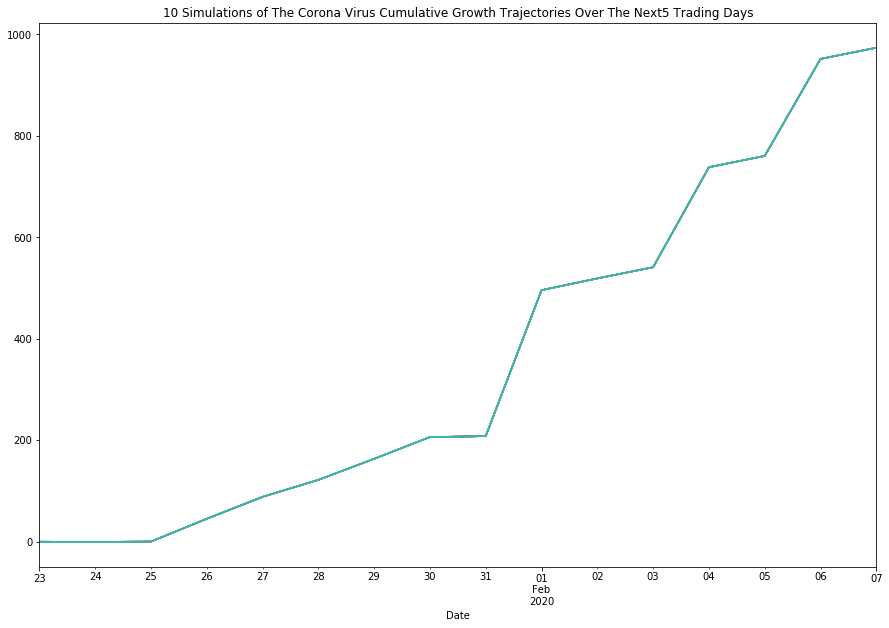

In [300]:
#Visualize the Simulation

plot_title = f'{number_simulations} Simulations of The Corona Virus Cumulative Growth Trajectories Over The Next{number_records} Trading Days'
CV_cumulative_returns.plot(legend=None, title=plot_title, figsize=(15,10))

In [301]:
import pandas_montecarlo
mc_infected = all_sum_cv['Infected'].montecarlo(sims=100, bust=-0.1, goal=1)

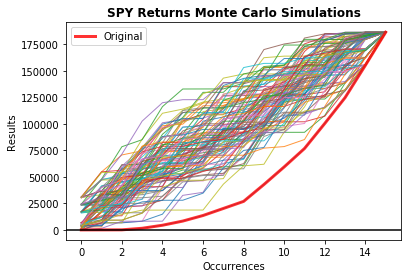

In [302]:
mc_infected.plot(title="SPY Returns Monte Carlo Simulations")  # optional: , figsize=(x, y)_infected

In [303]:
mc_deaths = all_sum_cv['Deaths'].montecarlo(sims=100, bust=-0.1, goal=1)

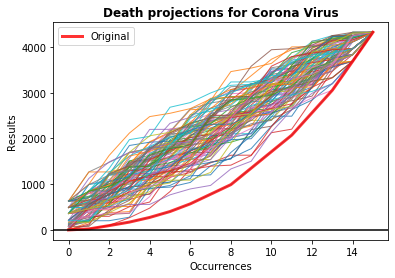

In [304]:
mc_deaths.plot(title='Death projections for Corona Virus')

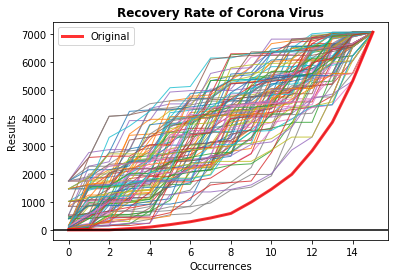

In [305]:
mc_recovery = all_sum_cv['Recovered'].montecarlo(sims=100, bust=-0.1, goal=1)
mc_recovery.plot(title='Recovery Rate of Corona Virus')

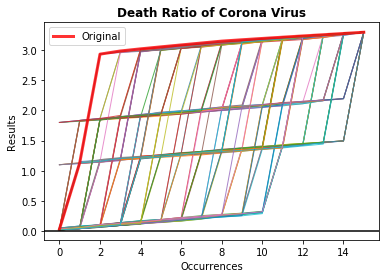

In [306]:
mc_death_ratio = all_sum_cv['death_ratio'].montecarlo(sims=100, bust=-0.1, goal=1)
mc_death_ratio.plot(title="Death Ratio of Corona Virus")

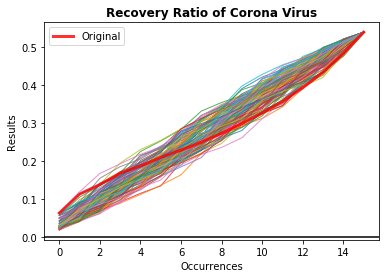

In [307]:
mc_recovery_ratio = all_sum_cv['recovered_ratio'].montecarlo(sims=100, bust=0, goal=1)
mc_recovery_ratio.plot (title= 'Recovery Ratio of Corona Virus')

AttributeError: '__make_object__' object has no attribute 'hvplot'